In [8]:
#Setup and instantiate code on Google Colab
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth4/AAAiaOAlI_Euf8AEGRh8zMMWoVyR8JITz1S5jB4IaS5gZRegu4_ctWg
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#one time installation
!pip install -q keras
!pip install -q h5py

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#keras model module
from keras.models import Sequential
#keras core layer
from keras.layers import Dense, Dropout, Activation, Flatten
#keras cnn layer
from keras.layers import Conv2D, MaxPooling2D, Embedding, LSTM, Conv1D, MaxPooling1D, BatchNormalization
#keras utilities
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
#use this if on Colab
x_train = pd.read_csv("drive/colab/xtrain_obfuscated.txt",header=None,names = ["x"])
y_train = pd.read_csv("drive/colab/ytrain.txt",header=None,names = ["y"])

In [2]:
#Use this if on Local machine
x_train = pd.read_csv("xtrain_obfuscated.txt",header=None,names = ["x"])
y_train = pd.read_csv("ytrain.txt",header=None,names = ["y"])

In [3]:
dat = pd.merge(x_train,y_train, left_index=True, right_index=True)

In [4]:
#Split into test and train
msk = np.random.rand(len(dat)) < 0.8
train = dat[msk]
test = dat[~msk]

In [8]:
#preprocess x_train
train_x = np.zeros((len(train),480,26))
for a,b in enumerate(train.x):
	for i,j in enumerate(train.iloc[a,0]):
		if i < 480:
			k=int(ord(j)-97)
			train_x[a][i][k]=1

Image at location: 0


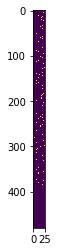

In [16]:
print("Image at location:",0)
plt.imshow(train_x[0])
plt.show()

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 480, 26,1)
train_x = train_x.astype('float32')

In [9]:
#preprocess y_train
train_y = np_utils.to_categorical(train.y, 12)

In [7]:
np.random.seed(7)

In [0]:
# create model with input taken as image and used cnn2d
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',strides=2, padding = "same", input_shape=(480,26,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

In [0]:
#compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [57]:
print(train_x.shape)
print(train_y.shape)

(26037, 480, 26, 1)
(26037, 12)


In [69]:
history = model.fit(train_x, train_y,
          batch_size=128, epochs=5, verbose=1,callbacks=[history])

Epoch 1/5
26037/26037 [==============================] - 9s 363us/step - loss: 1.3009 - acc: 0.5500
Epoch 2/5
26037/26037 [==============================] - 9s 347us/step - loss: 1.1651 - acc: 0.5917
Epoch 3/5
26037/26037 [==============================] - 9s 348us/step - loss: 1.0521 - acc: 0.6306
Epoch 4/5
24576/26037 [===========================>..] - ETA: 0s - loss: 0.9483 - acc: 0.663926037/26037 [==============================] - 9s 349us/step - loss: 0.9529 - acc: 0.6626
Epoch 5/5
26037/26037 [==============================] - 9s 349us/step - loss: 0.8787 - acc: 0.6863


In [0]:
#preprocess x_test
test_x = np.zeros((len(test),480,26))
for a,b in enumerate(test.x):
	for i,j in enumerate(test.iloc[a,0]):
		if i < 480:
			k=int(ord(j)-97)
			test_x[a][i][k]=1
test_x = test_x.reshape(test_x.shape[0], 480, 26,1)
test_x = test_x.astype('float32')

In [0]:
#preprocess y_train
test_y = np_utils.to_categorical(test.y, 12)

In [0]:
score = model.evaluate(test_x, test_y, verbose=0)


In [85]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.9842588206439051
Test accuracy: 0.38310685608400247


In [78]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


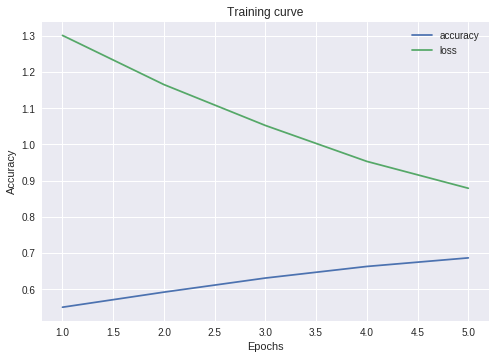

In [83]:
plt.plot(range(1,6), history.history.get('acc'),label="accuracy")
plt.plot(range(1,6), history.history.get('loss'),label="loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training curve")
plt.show()

In [96]:
# serialize model to JSON
model_json = model1.to_json()
with open("drive/colab/model1-926.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("drive/colab/model1-926.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('drive/colab/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("drive/colab/model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(test_x, test_y, verbose=0)

# Trying other model with embedding/LSTM and loss function different

In [24]:
#prepocess one-hot encoding into x_train
MAX_LEN=453
x_t1 = np.zeros((len(train.x), MAX_LEN), dtype=np.int)

for a,b in enumerate(train.x):
	for i,j in enumerate(train.iloc[a,0]):
		if i < MAX_LEN:
			k=int(ord(j)-97)
			x_t1[a][i]=k
print(x_t1.shape)
print(train_y.shape)

(26018, 453)


In [60]:
#prepocess one-hot encoding into x_test
x_t2 = np.zeros((len(test.x), MAX_LEN), dtype=np.int)

for a,b in enumerate(test.x):
	for i,j in enumerate(test.iloc[a,0]):
		if i < MAX_LEN:
			k=int(ord(j)-97)
			x_t2[a][i]=k
print(x_t2.shape)
print(test_y.shape)

(6495, 453)
(6495, 12)


In [0]:
## new code trying for LSTM model
model1 = Sequential()
model1.add(Embedding(27,26 , input_length=MAX_LEN))
model1.add(BatchNormalization())
model1.add(Conv1D(32,5,padding='same',activation='relu',strides=2))
model1.add(MaxPooling1D(pool_size=2))
model1.add(BatchNormalization())
#model1.add(Flatten())
model1.add(LSTM(104, dropout=0.2, recurrent_dropout=0.1))
model1.add(Dense(256))
model1.add(Dropout(0.20))
model1.add(Dense(12, activation="softmax"))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [93]:
history1 = model1.fit(x_t1, train_y,batch_size=1000, epochs=15, validation_split=0.10, verbose=1)

Train on 23416 samples, validate on 2602 samples
Epoch 1/15
23416/23416 [==============================] - 13s 534us/step - loss: 0.2765 - acc: 0.9167 - val_loss: 0.2745 - val_acc: 0.9167
Epoch 2/15
23416/23416 [==============================] - 10s 411us/step - loss: 0.2726 - acc: 0.9167 - val_loss: 0.2701 - val_acc: 0.9167
Epoch 3/15
23416/23416 [==============================] - 10s 409us/step - loss: 0.2665 - acc: 0.9166 - val_loss: 0.2605 - val_acc: 0.9167
Epoch 4/15
23416/23416 [==============================] - 10s 411us/step - loss: 0.2574 - acc: 0.9166 - val_loss: 0.2697 - val_acc: 0.9167
Epoch 5/15
23416/23416 [==============================] - 10s 411us/step - loss: 0.2511 - acc: 0.9167 - val_loss: 0.2530 - val_acc: 0.9175
Epoch 6/15
23416/23416 [==============================] - 10s 411us/step - loss: 0.2451 - acc: 0.9177 - val_loss: 0.2438 - val_acc: 0.9187
Epoch 7/15
23416/23416 [==============================] - 10s 411us/step - loss: 0.2388 - acc: 0.9191 - val_loss: 0.2

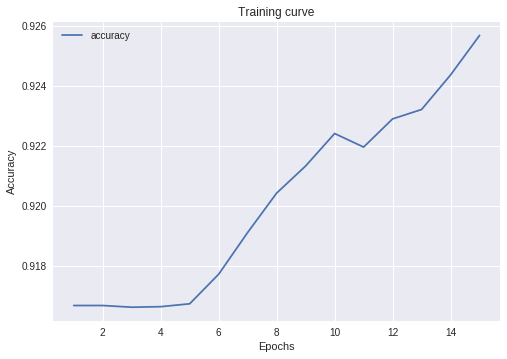

In [94]:
plt.plot(range(1,16), history1.history.get('acc'),label="accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training curve")
plt.show()

In [95]:
score1 = model1.evaluate(x_t2, test_y, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.1983827172425089
Test accuracy: 0.9264562612776577


In [0]:
## new code trying for LSTM model
model2 = Sequential()
model2.add(Embedding(27,26 , input_length=MAX_LEN))
model2.add(BatchNormalization())
model2.add(Conv1D(32,5,padding='same',activation='relu',strides=2))
model2.add(MaxPooling1D(pool_size=2))
model2.add(BatchNormalization())
#model2.add(Flatten())
model2.add(LSTM(104, dropout=0.2, recurrent_dropout=0.1))
model2.add(Dense(256))
model2.add(Dropout(0.20))
model2.add(Dense(12, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=["accuracy"])

Train on 23416 samples, validate on 2602 samples
Epoch 1/5
23416/23416 [==============================] - 15s 627us/step - loss: 0.5484 - acc: 0.8552 - val_loss: 0.4630 - val_acc: 0.9167
Epoch 2/5
23416/23416 [==============================] - 10s 412us/step - loss: 0.4567 - acc: 0.9095 - val_loss: 0.3970 - val_acc: 0.9167
Epoch 3/5
23416/23416 [==============================] - 10s 411us/step - loss: 0.4001 - acc: 0.9151 - val_loss: 0.3528 - val_acc: 0.9167
Epoch 4/5
23416/23416 [==============================] - 10s 414us/step - loss: 0.3617 - acc: 0.9163 - val_loss: 0.3247 - val_acc: 0.9167
Epoch 5/5
23416/23416 [==============================] - 10s 413us/step - loss: 0.3356 - acc: 0.9166 - val_loss: 0.3066 - val_acc: 0.9167


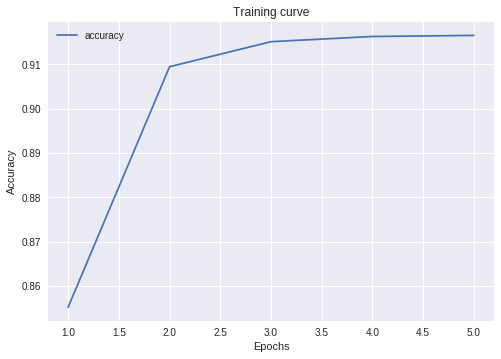

In [116]:
history2 = model2.fit(x_t1, train_y,batch_size=1000, epochs=5, validation_split=0.10, verbose=1)
plt.plot(range(1,6), history2.history.get('acc'),label="accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training curve")
plt.show()

In [76]:
score2 = model2.evaluate(x_t2, test_y, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.4088724964852513
Test accuracy: 0.8933923394795653


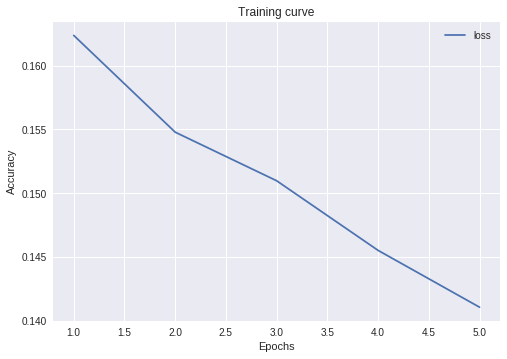

In [46]:
plt.plot(range(1,6), history2.history.get('loss'),label="loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training curve")
plt.show()